In [356]:
#!pip install lightgbm

In [357]:
#!pip install xgboost

In [358]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis 

In [359]:
train_df=pd.read_csv('titanic_train1.csv')
test_df=pd.read_csv('titanic_test1.csv')

In [360]:
# Add an identifier column to differentiate datasets
train_df['is_train'] = 1
test_df['is_train'] = 0

In [361]:
# Add a placeholder column for the target in test_data
test_df['Survived'] = -1  # Placeholder since test_df lacks 'Survived'


In [362]:
# Concatenate the datasets
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print(df.shape)

(1309, 13)


In [363]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,-1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,-1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,-1,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,-1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [364]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_train'],
      dtype='object')

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_train     1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


In [366]:
df.nunique()

PassengerId    1309
Survived          3
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
is_train          2
dtype: int64

In [367]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64

In [368]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.089783
1,2,-0.021661
2,3,-0.139633


In [369]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.17382
1,male,-0.18624


In [370]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.006270
3,3,0.000000
2,2,-0.023810
4,4,-0.045455
0,0,-0.081930
5,5,-0.166667
6,8,-0.222222


In [371]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
1,1,0.076471
2,2,0.061947
3,3,0.000000
5,5,0.000000
0,0,-0.090818
4,4,-0.333333
6,6,-0.500000
7,9,-1.000000


In [372]:
# Percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
is_train        0.000000
dtype: float64


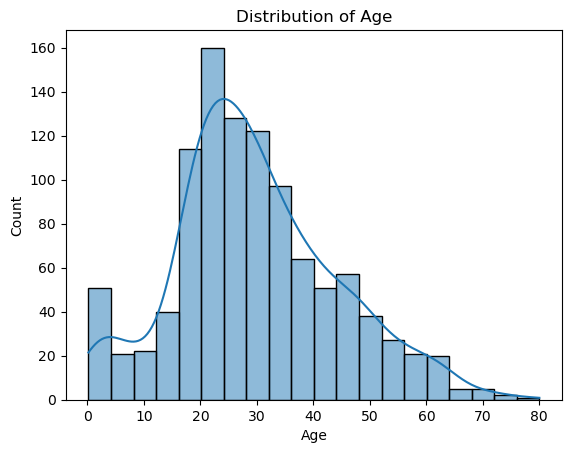

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a numerical feature (e.g., Age)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()


In [374]:
# Unique values in categorical columns
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      843
female    466
Name: count, dtype: int64
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


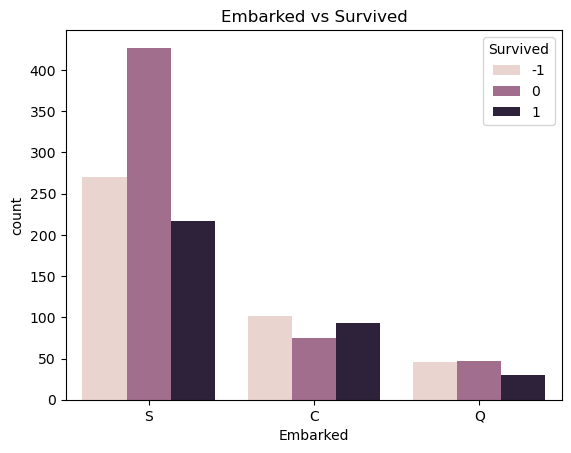

In [375]:
# Count plot for categorical feature
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked vs Survived')
plt.show()

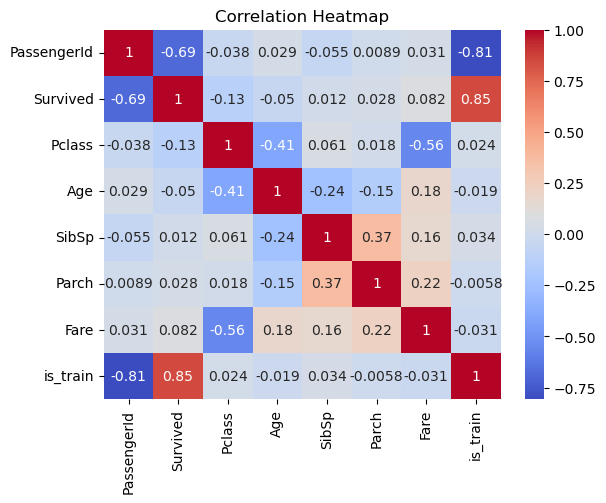

In [376]:
# Correlation heatmap
correlation_matrix = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare' , 'is_train']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

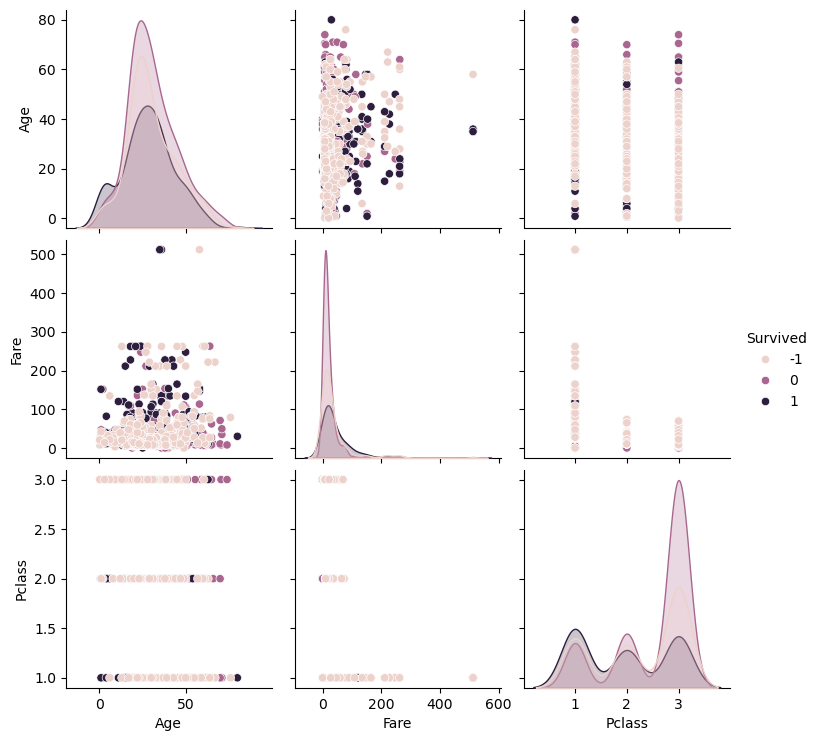

In [377]:
# Pairplot to examine relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()


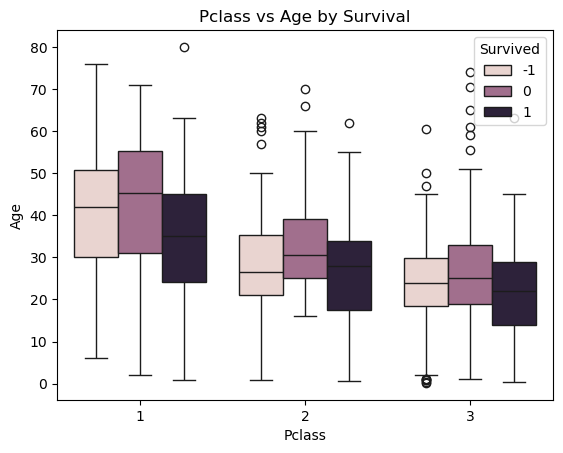

In [378]:
# Boxplot for numerical vs categorical
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')
plt.title('Pclass vs Age by Survival')
plt.show()

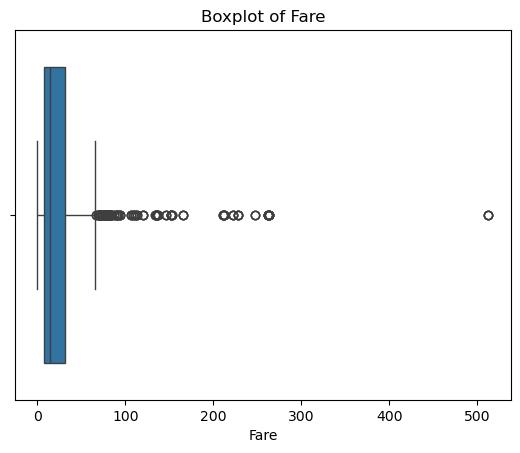

In [379]:
# Boxplot to detect outliers
sns.boxplot(data=df, x='Fare')
plt.title('Boxplot of Fare')
plt.show()


## Data Preprocessing

In [380]:
import warnings
warnings.filterwarnings('ignore')

In [381]:
df.duplicated().any()

False

In [382]:
df.drop(columns=['Cabin'], axis=1,inplace=True)

In [383]:
#  Handle missing values for train dataset
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert to integers
df['Age'] = df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

# Verify conversion
print(df['Age'].dtype)
print(df['Fare'].dtype)

int32
int32


In [384]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,1
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30,C,1


In [385]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Sex', 'Embarked']

# Apply Label Encoding to each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Mapping for '{col}':", dict(zip(le.classes_, le.transform(le.classes_))))

print(df)


Mapping for 'Sex': {'female': 0, 'male': 1}
Mapping for 'Embarked': {'C': 0, 'Q': 1, 'S': 2, nan: 3}
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305        -1       3   
1305         1306        -1       1   
1306         1307        -1       3   
1307         1308        -1       3   
1308         1309        -1       3   

                                                   Name  Sex  Age  SibSp  \
0                               Braund, Mr. Owen Harris    1   22      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1   
2                                Heikkinen, Miss. Laina    0   26      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1   
4                              Allen, Mr. William 

## Building Predictive Models

In [386]:
# Split back into train_data and test_data
train_data = df[df['is_train'] == 1].drop(['is_train'], axis=1)
test_data = df[df['is_train'] == 0].drop(['is_train', 'Survived'], axis=1)

# Extract features and target
X = train_data.drop(['Survived','Name','Ticket','PassengerId'], axis=1)
y = train_data['Survived']


In [387]:
# Check class distribution
print("Class distribution in y_train:\n", y.value_counts())

Class distribution in y_train:
 Survived
0    549
1    342
Name: count, dtype: int64


In [388]:
from sklearn.model_selection import train_test_split, GridSearchCV ,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier


In [389]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [390]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

#### Training the models on the training set and evaluation metrics

In [391]:
# XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=6,
    n_estimators=100
)
#xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [392]:
# Predictions
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [393]:
# Evaluation
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred,average='macro', zero_division=1),
    "Recall": recall_score(y_test, xgb_pred,average='macro', zero_division=1),
    "F1-Score": f1_score(y_test, xgb_pred, average='macro', zero_division=1),
    "ROC-AUC": roc_auc_score(y_test, xgb_prob)
}

In [394]:
print('Before Hyperparameter tuning Evaluation Metics')
print(" XGBoost Metrics:")
for metric, value in xgb_metrics.items():
    print(f"{metric}: {value:.2f}")

Before Hyperparameter tuning Evaluation Metics
 XGBoost Metrics:
Accuracy: 0.81
Precision: 0.81
Recall: 0.79
F1-Score: 0.80
ROC-AUC: 0.87


In [395]:
# LightGBM model
lgbm_model = LGBMClassifier(force_row_wise=True,random_state=42)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(force_row_wise=True, random_state=42)

In [396]:
# Predictions
lgbm_pred = lgbm_model.predict(X_test)
lgbm_prob = lgbm_model.predict_proba(X_test)[:, 1]

In [397]:
# Evaluation
lgbm_metrics = {
    "Accuracy": accuracy_score(y_test, lgbm_pred),
    "Precision": precision_score(y_test, lgbm_pred),
    "Recall": recall_score(y_test, lgbm_pred),
    "F1-Score": f1_score(y_test, lgbm_pred),
    "ROC-AUC": roc_auc_score(y_test, lgbm_prob)
}

In [398]:
print('Before Hyperparameter tuning Evaluation Metics')
print("\nLightGBM Metrics:")
for metric, value in lgbm_metrics.items():
    print(f"{metric}: {value:.2f}")

Before Hyperparameter tuning Evaluation Metics

LightGBM Metrics:
Accuracy: 0.83
Precision: 0.79
Recall: 0.80
F1-Score: 0.79
ROC-AUC: 0.87


#### cross-validation and hyperparameter tuning

In [399]:
# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Cross-validation
xgb_cv = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

xgb_cv.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", xgb_cv.best_params_)
print("Best ROC-AUC score for XGBoost (CV):", xgb_cv.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best ROC-AUC score for XGBoost (CV): 0.8619894442981153


In [400]:
# Train XGBoost with best parameters
xgb_best = XGBClassifier(**xgb_cv.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# Predictions
xgb_pred = xgb_best.predict(X_test)
xgb_prob = xgb_best.predict_proba(X_test)[:, 1]

# Metrics
xgb_metrics_ht = {
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred),
    "Recall": recall_score(y_test, xgb_pred),
    "F1-Score": f1_score(y_test, xgb_pred),
    "ROC-AUC": roc_auc_score(y_test, xgb_prob)
}
print('After Hyperparameter tuning Evaluation Metics')
print("\nXGBoost Metrics:")
for metric, value in xgb_metrics_ht.items():
    print(f"{metric}: {value:.2f}")


After Hyperparameter tuning Evaluation Metics

XGBoost Metrics:
Accuracy: 0.77
Precision: 0.90
Recall: 0.50
F1-Score: 0.64
ROC-AUC: 0.88


In [401]:
# Define hyperparameter grid
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Cross-validation
lgbm_cv = GridSearchCV(
    estimator=LGBMClassifier(force_row_wise=True,random_state=42),
    param_grid=lgbm_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

lgbm_cv.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for LightGBM:", lgbm_cv.best_params_)
print("Best ROC-AUC score for LightGBM (CV):", lgbm_cv.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [402]:
# Train LightGBM with best parameters
lgbm_best = LGBMClassifier(**lgbm_cv.best_params_, random_state=42)
lgbm_best.fit(X_train, y_train)

# Predictions
lgbm_pred = lgbm_best.predict(X_test)
lgbm_prob = lgbm_best.predict_proba(X_test)[:, 1]

# Metrics
lgbm_metrics_ht = {
    "Accuracy": accuracy_score(y_test, lgbm_pred),
    "Precision": precision_score(y_test, lgbm_pred),
    "Recall": recall_score(y_test, lgbm_pred),
    "F1-Score": f1_score(y_test, lgbm_pred),
    "ROC-AUC": roc_auc_score(y_test, lgbm_prob)
}

print('After Hyperparameter tuning Evaluation Metics')
print("\nLightGBM Metrics:")
for metric, value in lgbm_metrics_ht.items():
    print(f"{metric}: {value:.2f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


#### Before Hyperparameter tuning comparison

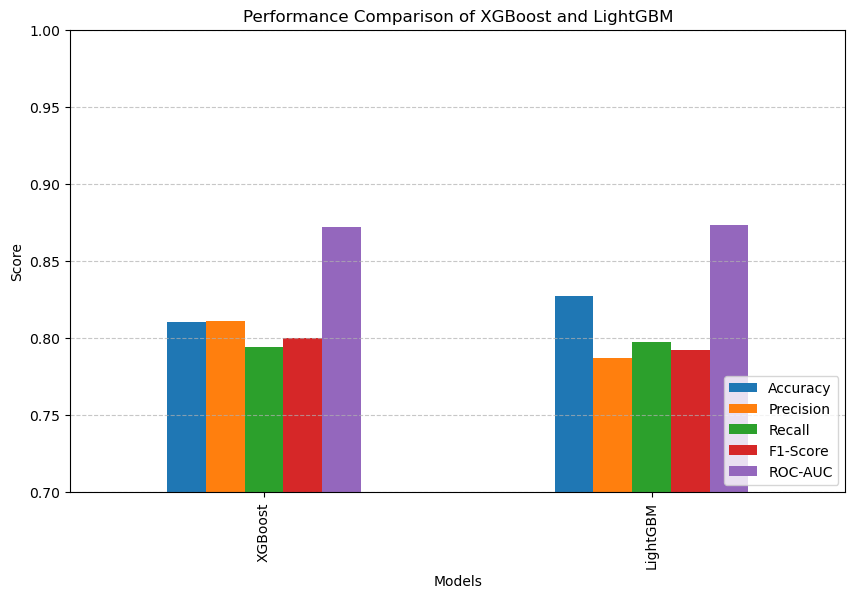

In [403]:
# Metrics for comparison
comparison_metrics = {
    "Accuracy": [xgb_metrics["Accuracy"], lgbm_metrics["Accuracy"]],
    "Precision": [xgb_metrics["Precision"], lgbm_metrics["Precision"]],
    "Recall": [xgb_metrics["Recall"], lgbm_metrics["Recall"]],
    "F1-Score": [xgb_metrics["F1-Score"], lgbm_metrics["F1-Score"]],
    "ROC-AUC": [xgb_metrics["ROC-AUC"], lgbm_metrics["ROC-AUC"]]
}

# Model names
models = ["XGBoost", "LightGBM"]

# Plot metrics for comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics_df = pd.DataFrame(comparison_metrics, index=models)
metrics_df.plot(kind='bar', ax=ax)
ax.set_title("Performance Comparison of XGBoost and LightGBM")
ax.set_ylabel("Score")
ax.set_xlabel("Models")
ax.set_ylim([0.7, 1.0])  # Assuming metrics are between 0.7 and 1.0
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


#### After hyperparameter tuning Comparison

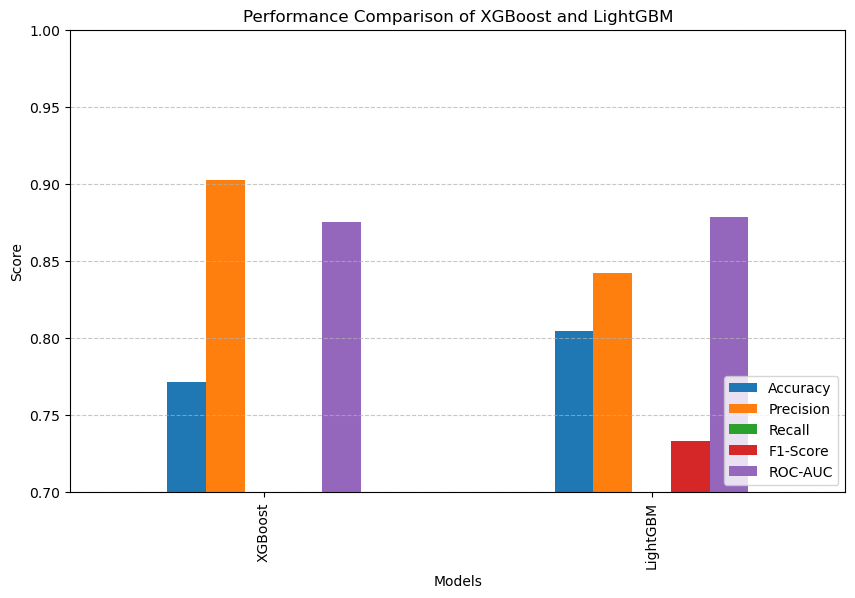

In [404]:
# Metrics for comparison
comparison_metrics = {
    "Accuracy": [xgb_metrics_ht["Accuracy"], lgbm_metrics_ht["Accuracy"]],
    "Precision": [xgb_metrics_ht["Precision"], lgbm_metrics_ht["Precision"]],
    "Recall": [xgb_metrics_ht["Recall"], lgbm_metrics_ht["Recall"]],
    "F1-Score": [xgb_metrics_ht["F1-Score"], lgbm_metrics_ht["F1-Score"]],
    "ROC-AUC": [xgb_metrics_ht["ROC-AUC"], lgbm_metrics_ht["ROC-AUC"]]
}

# Model names
models = ["XGBoost", "LightGBM"]

# Plot metrics for comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics_df = pd.DataFrame(comparison_metrics, index=models)
metrics_df.plot(kind='bar', ax=ax)
ax.set_title("Performance Comparison of XGBoost and LightGBM")
ax.set_ylabel("Score")
ax.set_xlabel("Models")
ax.set_ylim([0.7, 1.0])  # Assuming metrics are between 0.7 and 1.0
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

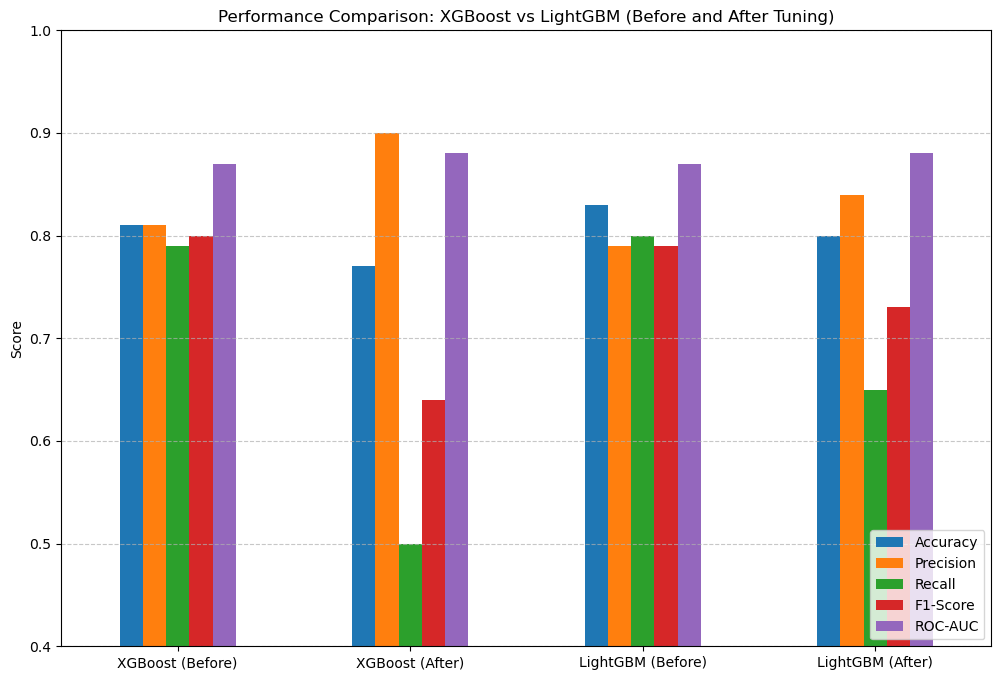

In [405]:
# Data for metrics comparison
metrics_comparison = {
    "Accuracy": [0.81, 0.77, 0.83, 0.80],
    "Precision": [0.81, 0.90, 0.79, 0.84],
    "Recall": [0.79, 0.50, 0.80, 0.65],
    "F1-Score": [0.80, 0.64, 0.79, 0.73],
    "ROC-AUC": [0.87, 0.88, 0.87, 0.88]
}

# Models and tuning status
models = ['XGBoost (Before)', 'XGBoost (After)', 'LightGBM (Before)', 'LightGBM (After)']
metrics_df = pd.DataFrame(metrics_comparison, index=models)

# Plot metrics for comparison
metrics_df.plot(kind="bar", figsize=(12, 8))
plt.title("Performance Comparison: XGBoost vs LightGBM (Before and After Tuning)")
plt.ylabel("Score")
plt.ylim([0.4, 1.0])  
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
